In [20]:
from bs4 import BeautifulSoup
import requests

In [21]:
import pandas as pd

In [22]:
# Make request
url = "https://docs.google.com/document/d/e/2PACX-1vRMx5YQlZNa3ra8dYYxmv-QIQ3YJe8tbI3kqcuC7lQiZm-CSEznKfN_HYNSpoXcZIV3Y_O3YoUB1ecq/pub"
html_response = requests.get(url=url)

response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table (assuming it's the first table on the page)
table = soup.find('table')

# Extract table headers
headers = [header.text for header in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        rows.append([cell.text for cell in cells])




In [23]:
print(rows)

[['x-coordinate', 'Character', 'y-coordinate'], ['0', '█', '0'], ['0', '█', '1'], ['0', '█', '2'], ['1', '▀', '1'], ['1', '▀', '2'], ['2', '▀', '1'], ['2', '▀', '2'], ['3', '▀', '2']]


In [24]:
# Convert list to DataFrame
rows.pop(0)

df = pd.DataFrame(rows, columns=['x-coordinate', 'Character', 'y-coordinate'])

print(df)

  x-coordinate Character y-coordinate
0            0         █            0
1            0         █            1
2            0         █            2
3            1         ▀            1
4            1         ▀            2
5            2         ▀            1
6            2         ▀            2
7            3         ▀            2


In [25]:
import matplotlib.pyplot as plt

In [26]:
print(df.dtypes)

x-coordinate    object
Character       object
y-coordinate    object
dtype: object


In [27]:
df['x-coordinate'] = pd.to_numeric(df['x-coordinate'], errors='coerce')  # Convert to numeric (errors='coerce' handles non-numeric values)
print(df.dtypes)

x-coordinate     int64
Character       object
y-coordinate    object
dtype: object


In [28]:
df['y-coordinate'] = pd.to_numeric(df['y-coordinate'], errors='coerce')  # Convert to numeric (errors='coerce' handles non-numeric values)
print(df.dtypes)

x-coordinate     int64
Character       object
y-coordinate     int64
dtype: object


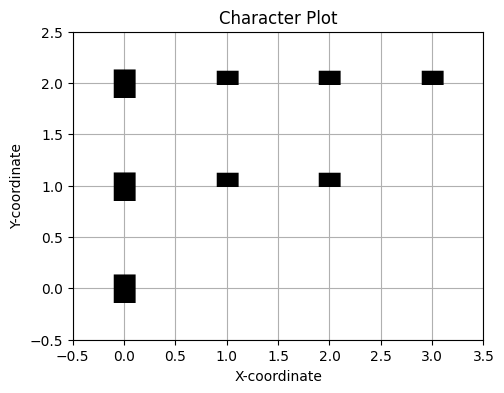

In [30]:
# Create the plot
plt.figure(figsize=(6, 4))  # Adjust figure size if needed

for x, y, char in zip(df['x-coordinate'], df['y-coordinate'], df['Character']):
    plt.text(x, y, char, ha='center', va='center', fontsize=20) # Adjust fontsize as needed

# Set plot limits and labels (optional, but recommended)
plt.xlim(df['x-coordinate'].min() - 0.5, df['x-coordinate'].max() + 0.5)  # Add padding
plt.ylim(df['y-coordinate'].min() - 0.5, df['y-coordinate'].max() + 0.5)  # Add padding
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Character Plot')


# Show the plot
plt.grid(True) # Add grid for better visualization (optional)
plt.gca().set_aspect('equal') # To have equal scaling on both axes
plt.show()
